In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



X_train = pd.read_csv("C:/Users/ptoma/Desktop/X_train.csv")


In [85]:
X_train[517:525]

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
517,0.117188,0.993982,0.000063,-0.103077,0.000973,-0.462828,0.121989,-0.241929,-1.070037,-0.531154,-0.122051,0.345006,1.069064,517
518,0.156250,0.989271,0.000104,-0.138188,0.001097,-0.476416,0.064174,-0.515444,-2.106407,-0.512855,-0.064278,0.653633,2.105310,518
519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519
520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520
521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,521
522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,522
523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,523
524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,524


In [16]:
idx = np.hstack((0,X_train[X_train.t==10].index.values))
#idx.shape,X_train.t.min(),X_train.t.max()
print(idx[0:10])


[   0  256  513 1027 1284 1798 2055 2312 2569 2826]


Plot 1 , k=2228
Plot 2 , k=1740
Plot 3 , k=4209


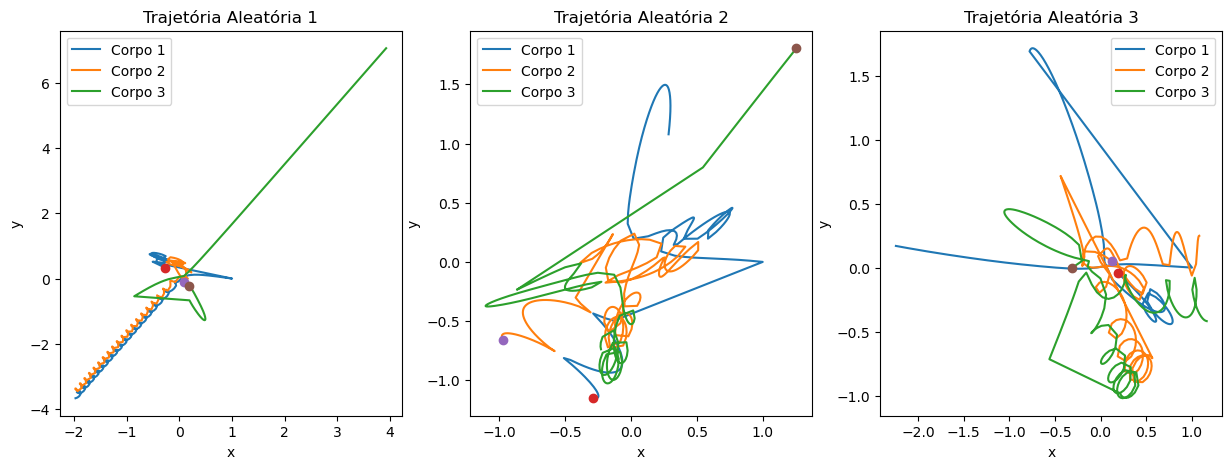

In [46]:
# Simulação do DataFrame X_train
df = X_train  # Supondo que X_train já esteja definido
idx = np.arange(0, df.shape[0], 258)  # Definindo idx baseado no número de dados

# Criar uma figura com 3 subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gerar 3 índices aleatórios
for i in range(3):
    k = np.random.randint(0, idx.shape[0])  # Escolher k aleatório para cada subplot
    print(f"Plot {i+1} , k={k}")
    
    pltidx = range(idx[k], 257+idx[k])  # Intervalo de 257 posições para cada corpo
    pltsquare = idx[k]  # Ponto inicial destacado
    
    # Plotar em cada subplot
    axs[i].plot(df.x_1[pltidx], df.y_1[pltidx],label="Corpo 1")
    axs[i].plot(df.x_2[pltidx], df.y_2[pltidx],label="Corpo 2")
    axs[i].plot(df.x_3[pltidx], df.y_3[pltidx],label="Corpo 3")

    axs[i].legend()
    
    # Destacar a posição inicial com um ponto
    axs[i].plot(df.x_1[pltsquare], df.y_1[pltsquare], 'o')
    axs[i].plot(df.x_2[pltsquare], df.y_2[pltsquare], 'o')
    axs[i].plot(df.x_3[pltsquare], df.y_3[pltsquare], 'o')
    
    axs[i].set_title(f'Trajetória Aleatória {i+1}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')





# Exibir a figura com os 3 gráficos
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#Criação do modelo com o conjunto de treino

features=X_train[['x_1', 'y_1', 'v_x_1', 'v_y_1', 
                'x_2', 'y_2', 'v_x_2', 'v_y_2', 
                'x_3', 'y_3', 'v_x_3', 'v_y_3']]

targets= X_train[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].shift(-1).dropna()

features = features.iloc[:-1]

train_X, val_X, train_y, val_y = train_test_split(features, targets, random_state=0,test_size=0.2) #random_state=0 garante que , sempre que dermos run, a divisão treino/validação seja igual

baseline = Pipeline([
    ('scaler', StandardScaler()),  
    ('regressor', LinearRegression())  
])

baseline.fit(train_X, train_y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [30]:
# 6. Fazer previsões no conjunto de validação
val_predictions = baseline.predict(val_X)

# 7. Avaliar o erro (MSE)
mse = mean_absolute_error(val_y, val_predictions)
print(f"Mean Squared Error : {mse}")


Mean Squared Error : 0.01833859004413614


In [65]:
print(type(val_y))
print(type(val_predictions))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


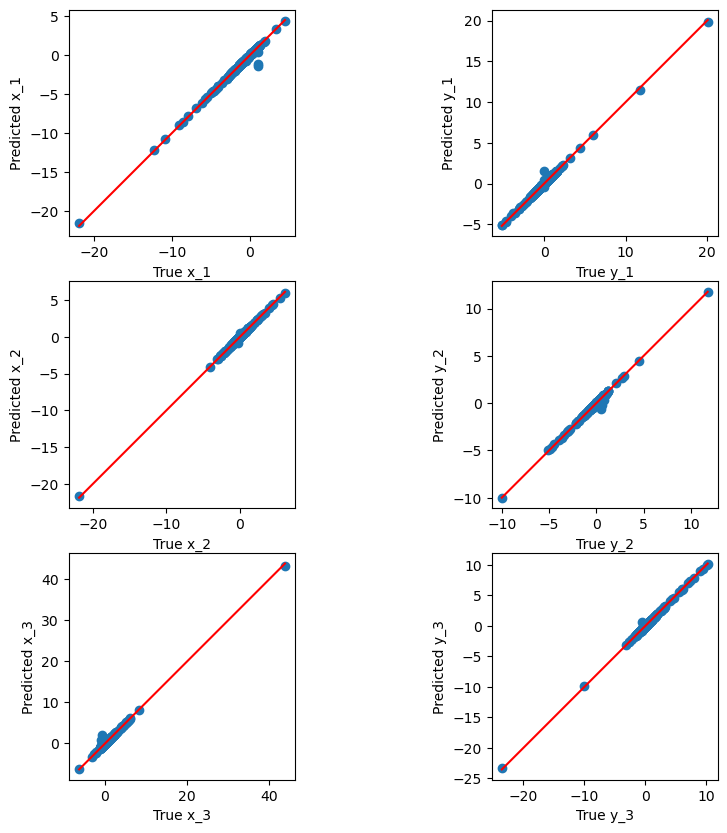

In [67]:


def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

plot_y_yhat(val_y,pipeline.predict(val_X))

In [73]:
X_test=pd.read_csv("C:/Users/ptoma/Desktop/X_test.csv")

X_test.head()




,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085


In [81]:


X_test = X_test.drop(columns=['Id'])
print(X_test.columns)


KeyError: "['Id'] not found in axis"

In [3]:
import os

# Obter o caminho completo do notebook
notebook_path = os.path.abspath("ProjetoAA.ipynb")
print(notebook_path)

C:\Users\ptoma\ProjetoAA\ProjetoAA.ipynb
